# Nuvem de Palavras

In [35]:
###Bibliotecas
###Pacote para o tratamento das palavras
###install.packages("tm")

In [36]:
###Pacote para a criação da nuvem
###install.packages("wordcloud")

In [3]:
library(tm)

Loading required package: NLP


In [4]:
###Fontes da dados do pacote tm
getSources()

[1] "DataframeSource" "DirSource"       "URISource"       "VectorSource"   
[5] "XMLSource"       "ZipSource"

In [5]:
###Formas de leitura do pacote tm
getReaders()

[1] "readDOC"                 "readPDF"                
 [3] "readPlain"               "readRCV1"               
 [5] "readRCV1asPlain"         "readReut21578XML"       
 [7] "readReut21578XMLasPlain" "readTabular"            
 [9] "readTagged"              "readXML"

In [6]:
###Criacao do Corpus
###Usaremos o VCorpus (corpus volatil em memroria) e o arquivo em txt
corpus = VCorpus(DirSource("C:/Arquivo", encoding="UTF-8"), readerControl=list(reader=readPlain, language="eng"))

In [7]:
###Metadados do um arquivo
meta(corpus[[1]])

  author       : character(0)
  datetimestamp: 2018-08-08 00:04:21
  description  : character(0)
  heading      : character(0)
  id           : Supervising sign language interpreters students.txt
  language     : eng
  origin       : character(0)

In [8]:
###Inspeção do corpus
inspect(corpus[[1]])

<<PlainTextDocument>>
Metadata:  7
Content:  chars: 32259

<U+FEFF>Procedia - Social and Behavioral Sciences 29 (2011) 5 – 12 
Available online at www.sciencedirect.com
International Conference on Education and Educational Psychology (ICEEPSY 2011) 
Supervising sign language interpreters students 
Cátia Marlene Silva Monteiro Santos * 
Unidade Local de Saúde de Matosinhos EPE, Rua Dr. Eduardo Torres s/n, 4460 – Matosinhos, Portugal 
 
Abstract 
The  challenge  for  the  supervisor  is  to  prepare  the  sign  language  interpreters  students  for  flexibility  and  adaptability  to 
demanding situations that will emerge in their life course. The concern about the quality of these students is the result of another 
concern felt that is the quality of their supervisors who assist the students in their teaching - learning process. 
Through a literature review, this paper aims to reflect on the supervisor’s profile of the sign language interpreters students and to 
understand how he/she ca

In [9]:
###Tratamentos
###Stopwords em Ingles
stopwords("english")

[1] "i"          "me"         "my"         "myself"     "we"        
  [6] "our"        "ours"       "ourselves"  "you"        "your"      
 [11] "yours"      "yourself"   "yourselves" "he"         "him"       
 [16] "his"        "himself"    "she"        "her"        "hers"      
 [21] "herself"    "it"         "its"        "itself"     "they"      
 [26] "them"       "their"      "theirs"     "themselves" "what"      
 [31] "which"      "who"        "whom"       "this"       "that"      
 [36] "these"      "those"      "am"         "is"         "are"       
 [41] "was"        "were"       "be"         "been"       "being"     
 [46] "have"       "has"        "had"        "having"     "do"        
 [51] "does"       "did"        "doing"      "would"      "should"    
 [56] "could"      "ought"      "i'm"        "you're"     "he's"      
 [61] "she's"      "it's"       "we're"      "they're"    "i've"      
 [66] "you've"     "we've"      "they've"    "i'd"        "you'd"     
 [71] "he'd"       "she'd"      "we'd"       "they'd"     "i'll"      
 [76] "you'll"     "he'll"      "she'll"     "we'll"      "they'll"   
 [81] "isn't"      "aren't"     "wasn't"     "weren't"    "hasn't"    
 [86] "haven't"    "hadn't"     "doesn't"    "don't"      "didn't"    
 [91] "won't"      "wouldn't"   "shan't"     "shouldn't"  "can't"     
 [96] "cannot"     "couldn't"   "mustn't"    "let's"      "that's"    
[101] "who's"      "what's"     "here's"     "there's"    "when's"    
[106] "where's"    "why's"      "how's"      "a"          "an"        
[111] "the"        "and"        "but"        "if"         "or"        
[116] "because"    "as"         "until"      "while"      "of"        
[121] "at"         "by"         "for"        "with"       "about"     
[126] "against"    "between"    "into"       "through"    "during"    
[131] "before"     "after"      "above"      "below"      "to"        
[136] "from"       "up"         "down"       "in"         "out"       
[141] "on"         "off"        "over"       "under"      "again"     
[146] "further"    "then"       "once"       "here"       "there"     
[151] "when"       "where"      "why"        "how"        "all"       
[156] "any"        "both"       "each"       "few"        "more"      
[161] "most"       "other"      "some"       "such"       "no"        
[166] "nor"        "not"        "only"       "own"        "same"      
[171] "so"         "than"       "too"        "very"

In [10]:
###Remocao de stopwords do arquivo
corpus = tm_map(corpus, removeWords, stopwords("english"))

In [11]:
###Remocao de espaco em branco
corpus = tm_map(corpus, stripWhitespace)

In [12]:
###Remocao de pontuação
corpus = tm_map(corpus, removePunctuation)

In [53]:
###Remocao de numeros
corpus = tm_map(corpus, removeNumbers)

In [54]:
###Criacao da nuvem de palavras
library(wordcloud)

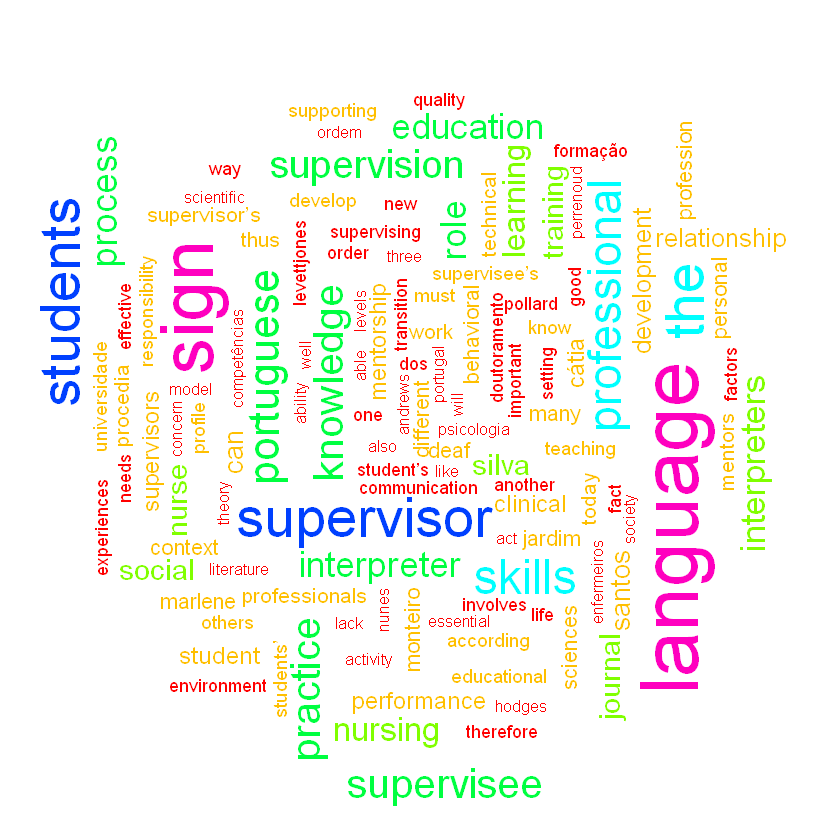

In [55]:
nuvem_de_palavras = wordcloud(corpus, max.words = 120, random.order = T, colors = rainbow(8),rot.per = 0.5, use.r.layout = T)

In [56]:
###Matriz de termos
freq = TermDocumentMatrix(corpus)

In [57]:
###Transformo em matriz do r
matriz = as.matrix(freq)

In [58]:
###Orndenar os dados de acordo com a frequencia em ordem decrescente
matriz = sort(rowSums(matriz),decreasing = T)

In [59]:
###Construção do Dataframe
matriz = data.frame(word=names(matriz), freq=matriz)

In [60]:
head (matriz, n=120)

,word,freq
language,language,45
sign,sign,41
students,students,29
supervisor,supervisor,29
the,the,28
skills,skills,25
professional,professional,24
portuguese,portuguese,21
knowledge,knowledge,20
practice,practice,20
